In [182]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [183]:
#Importing dataset
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/BA/customer_booking.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
df_ba= pd.read_csv(file_path,encoding='latin-1')


In [185]:
#Looking at data
df_ba.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


By looking at data booking_complete is the dependent variable/ label and we are dealing with binary classification

In [186]:
df_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [187]:
df_ba.describe()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [188]:
df_ba.shape

(50000, 14)

In [189]:

df=df_ba.copy()

In [190]:
#Checking for infinte and null values
print(f"Null values count in BA dataset \n {df.isnull().sum()}\n\n")
ba_infinite_counts = df.isin([np.inf, -np.inf]).sum()
print(f"Infinite value count in Rossmann dataset \n{ba_infinite_counts}\n\n")

Null values count in BA dataset 
 num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


Infinite value count in Rossmann dataset 
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64




## **BA dataset variable description**

**num_passengers** : Number of passengers

**sales_channel** : Purchase through Mobile or Internet

**trip_type**   : Type of trip round/circle/oneway

**purchase_lead** :  No. of days between booking and travel

**length_of_stay**: Duration of stay in days

**flight_hour** : Flight departure time [0-22]


**flight_day** : Day of journey [Sun-Sat]

**route** : journey path

**booking_origin**: journey origin

**wants_extra_baggage** : 0-no ,1-yes

**wants_preferred_seat** : 0-no,1-yes

**wants_in_flight_meals**: 0-no,1-yes

**flight_duration** : Flight journey in hrs

**booking_complete** :  0-no, 1-yes


# **EDA**

# **Sales_Channel**

In [191]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

print(f'Percentage of sales channel through internet: {per_internet}')
print(f'Percentage of sales channel through mobile: {per_mobile}')

Percentage of sales channel through internet: 88.764
Percentage of sales channel through mobile: 11.236


# **Trip_type**

In [192]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [193]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [194]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100


print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


# **Purchase Lead**

<Axes: xlabel='purchase_lead'>

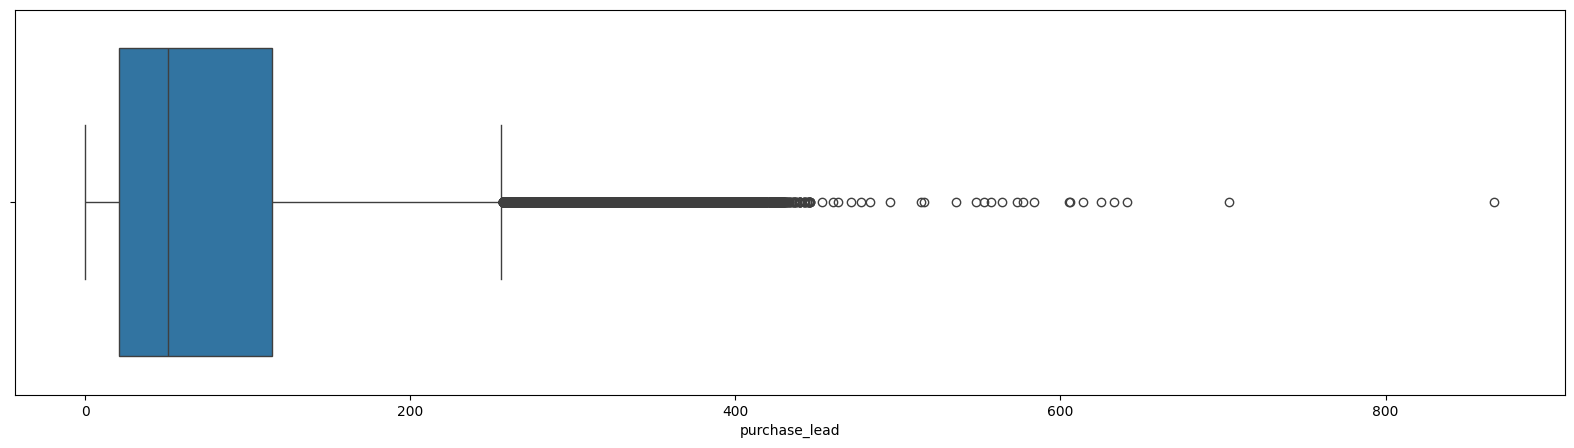

In [195]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df["purchase_lead"])

In [196]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

Purchase lead- Time in days between booking and travel


It is unlikey that you can book a ticket almost 2 years advance on any platform as airlines restrict to mostly 1 year. These rows are treated as outliers and should be removed.

In [197]:
#removing ouliers in purchase_lead
df=df[df.purchase_lead < 600]

# **Length_of_stay**

<Axes: xlabel='length_of_stay'>

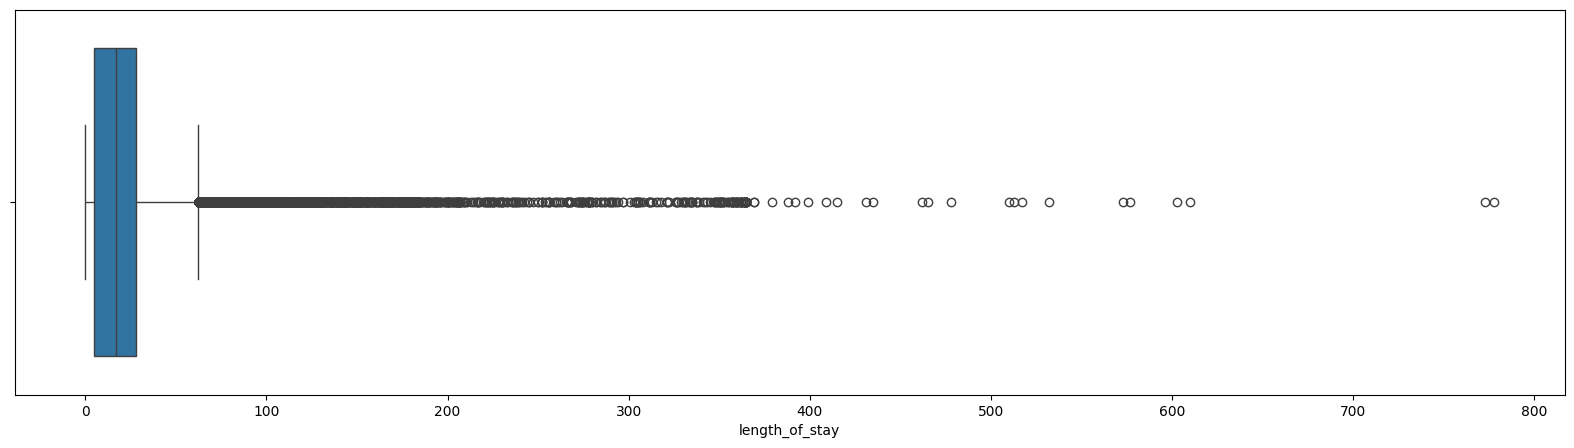

In [198]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df["length_of_stay"])

In [199]:
(df.length_of_stay >100) .value_counts()

False    48854
True      1138
Name: length_of_stay, dtype: int64

In [200]:
(df.length_of_stay >400) .value_counts()

False    49975
True        17
Name: length_of_stay, dtype: int64

In [201]:
(df.length_of_stay >500) .value_counts()

False    49982
True        10
Name: length_of_stay, dtype: int64

Since not more info is given on length_of_stays >600. For simplicity we are removing the data greater than 600.

In [202]:
#Removing outliers
df=df[df.length_of_stay <500]

# **Flight_day**

In [203]:
df['flight_day'].value_counts()

Mon    8099
Wed    7672
Tue    7671
Thu    7419
Fri    6759
Sun    6553
Sat    5809
Name: flight_day, dtype: int64

Need to convert days from object to interger so mapping is done.

In [204]:
day_mapping={'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6,'Sun':7}

In [205]:
df.flight_day= df.flight_day.map(day_mapping)

<ipython-input-205-3439bfa41875>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flight_day= df.flight_day.map(day_mapping)


In [206]:
df.flight_day.value_counts()

1    8099
3    7672
2    7671
4    7419
5    6759
7    6553
6    5809
Name: flight_day, dtype: int64

# **Route**

Text(0, 0.5, 'Number of bookings')

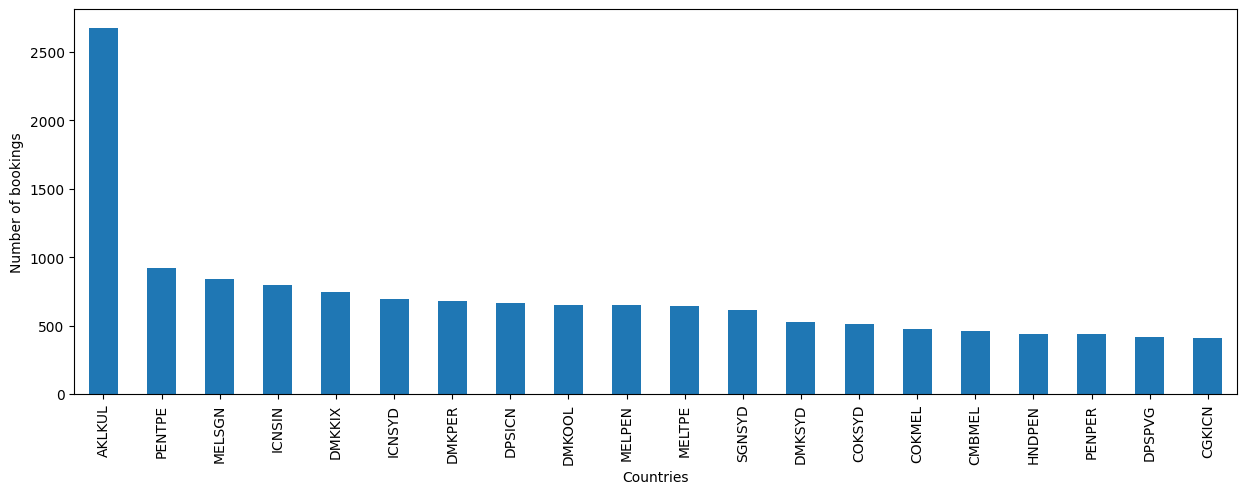

In [207]:
plt.figure(figsize=(15,5))
ax = df.route.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")


In [208]:
df.route.value_counts()

AKLKUL    2678
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

This column has 799 categories and no additional info is given on this column. So this column can be dropped.

---



# **Booking_origin**

Text(0, 0.5, 'Number of bookings')

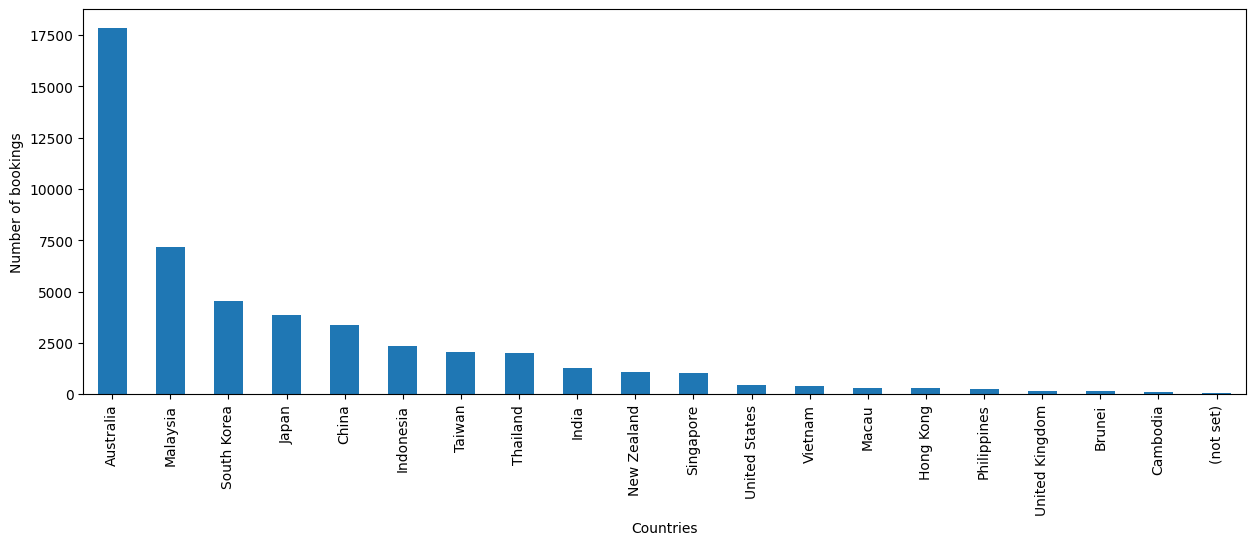

In [209]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")


In [210]:
df.booking_origin.value_counts()

Australia               17863
Malaysia                 7172
South Korea              4559
Japan                    3884
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64



This column has 104 categories and no additional info is given on this column. So this column can be dropped.

# **Wants_extra_baggage**

In [211]:
df.wants_extra_baggage.value_counts()

1    33431
0    16551
Name: wants_extra_baggage, dtype: int64

# **Wants_preferred_seat**

In [212]:
df.wants_preferred_seat.value_counts()

0    35139
1    14843
Name: wants_preferred_seat, dtype: int64

# **Wants_in_flight_meals**

In [213]:
df.wants_in_flight_meals.value_counts()

0    28636
1    21346
Name: wants_in_flight_meals, dtype: int64

# **Flight_duration**

In [214]:
df.flight_duration.value_counts()

8.83    14511
8.58     6961
5.62     5522
6.62     4720
7.00     3373
7.57     2835
4.67     2742
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64

# **Booking_complete**

In [215]:
df.booking_complete.value_counts()

0    42507
1     7475
Name: booking_complete, dtype: int64

In [216]:
unsuccessful_booking_percent= df.booking_complete.value_counts().values[0]/df.booking_complete.count() *100
successful_booking_percent= 100-unsuccessful_booking_percent

print(f'Unsuccessful booking percentage: {unsuccessful_booking_percent}')
print(f'Successful booking percentage: {successful_booking_percent}')

Unsuccessful booking percentage: 85.04461606178224
Successful booking percentage: 14.955383938217764


It is observed that our dependent variable has an unbalanced data which will be treated later.

In [217]:
#Making a copy
df_final= df.copy()

In [218]:
#Removing unwanted features
df_final.drop(['route','booking_origin'], axis=1, inplace=True)
df_final.reset_index(drop=True, inplace=True)

In [219]:
#OHE the categorical features
df_new= pd.get_dummies(df_final, drop_first= True, dtype= int)

In [220]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49982 entries, 0 to 49981
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49982 non-null  int64  
 1   purchase_lead          49982 non-null  int64  
 2   length_of_stay         49982 non-null  int64  
 3   flight_hour            49982 non-null  int64  
 4   flight_day             49982 non-null  int64  
 5   wants_extra_baggage    49982 non-null  int64  
 6   wants_preferred_seat   49982 non-null  int64  
 7   wants_in_flight_meals  49982 non-null  int64  
 8   flight_duration        49982 non-null  float64
 9   booking_complete       49982 non-null  int64  
 10  sales_channel_Mobile   49982 non-null  int64  
 11  trip_type_OneWay       49982 non-null  int64  
 12  trip_type_RoundTrip    49982 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.0 MB


In [221]:
#Extracting the dependent variable and removing from df_new
label= df_new['booking_complete']
df_new= df_new.drop('booking_complete',axis=1)

df_new.reset_index(drop=True, inplace=True)

# **Scaling the values using Standardization**

In [222]:
#Standardization

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled_df= scaler.fit_transform(df_new)
scaled_df= pd.DataFrame(scaled_df, columns= df_new.columns)
#Adding label back after scaling
scaled_df['label']= label

In [223]:
scaled_df.reset_index(drop=True, inplace=True)

# **Splitting Train and Test Data**

In [224]:
#Spliting data into train and test sets

from sklearn.model_selection import train_test_split

X= scaled_df.iloc[:,:-1]
y= scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.20, random_state=10)

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [226]:
#Creating function for passing  ML model

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)


# **Random Forest Classifier**

In [227]:
#RF object creation
rf_classifier= RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [228]:
#ML model on train dataset
y_pred_train = model_fit_predict(rf_classifier, X_train, y_train, X_train)
set(y_pred_train)

#Metrics
print(f'TRAINING DATA :\n\n')
print(metrics.classification_report(y_pred_train,y_train))

#roc-auc score for training data
roc= round(roc_auc_score(y_train,y_pred_train),2)
print(f'ROC-AUC Score:{roc}')


TRAINING DATA :


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     36466
           1       0.58      1.00      0.74      3519

    accuracy                           0.94     39985
   macro avg       0.79      0.97      0.85     39985
weighted avg       0.96      0.94      0.94     39985

ROC-AUC Score:0.79


In [229]:
#ML Model on test dataset
y_pred_test= model_fit_predict(rf_classifier, X_train, y_train, X_test)
set(y_pred_train)

#Metrics
print(f'TESTING DATA :\n\n')
print(metrics.classification_report(y_pred_test,y_test))

#roc-auc score for training data
roc= round(roc_auc_score(y_test,y_pred_test),2)
print(f'ROC-AUC Score:{roc}')

TESTING DATA :


              precision    recall  f1-score   support

           0       0.99      0.86      0.92      9877
           1       0.04      0.51      0.08       120

    accuracy                           0.85      9997
   macro avg       0.52      0.68      0.50      9997
weighted avg       0.98      0.85      0.91      9997

ROC-AUC Score:0.52


Text(0.5, 0, 'Random Forest Feature Importance')

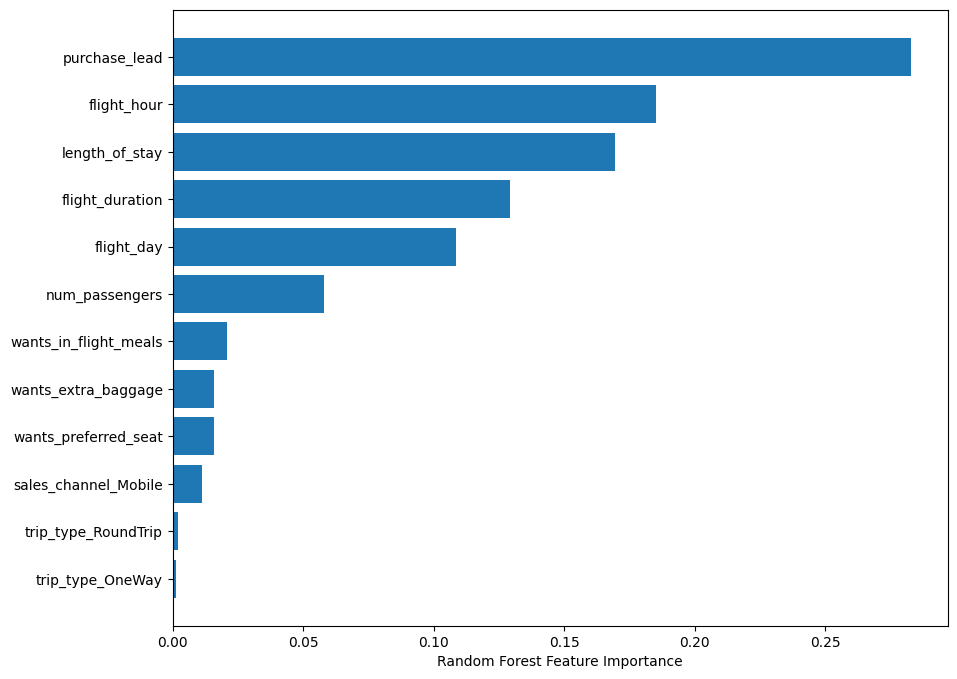

In [230]:
#Feature importance
feature_importance= rf_classifier.feature_importances_
plt.figure(figsize=(10,8))
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [231]:
scaled_df.label.value_counts()

0    42507
1     7475
Name: label, dtype: int64

On comparing the metrics of training and testing dataset, it is observed that F1-score is very less for testing datasaet. The reason for this is because of imbalanced dataset of the label class.

Usually when dealing with imbalanced datasets accuracy and roc_score are not good measures. When the positive class is more important F-1 score is usually focussed upon.

In order to increase the performance of our ML model, we need to create a balanced dataset of labels and then check metrics.

Using SMOTE- Synthetic Minority Oversampling Technique. It s a popular technique used to address class imbalance by generating synthetic samples for the minority class

# **SMOTE**

In [232]:
pip install imbalanced-learn


In [233]:
from imblearn.over_sampling import SMOTE

In [234]:
#Creating SMOTE object and resampling the data
smote= SMOTE(sampling_strategy="auto",random_state=10)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [235]:
#Equal no of classes created
y_resampled.value_counts()

0    42507
1    42507
Name: label, dtype: int64

In [236]:
#Final ML model
X_train, X_test, y_train, y_test = train_test_split(X_resampled ,y_resampled, test_size=0.20, random_state=10)
y_pred_train = model_fit_predict(rf_classifier, X_train, y_train, X_train)
print(f"For Training data:")
print(metrics.classification_report(y_pred_train,y_train))
roc= round(roc_auc_score(y_train,y_pred_train),2)
print(f'ROC-AUC Score:{roc}')

y_pred_test = model_fit_predict(rf_classifier, X_train, y_train, X_test)
print(f"For Testing  data:")
print(metrics.classification_report(y_pred_test,y_test))
roc= round(roc_auc_score(y_test,y_pred_test),2)
print(f'ROC-AUC Score:{roc}')

For Training data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34854
           1       0.98      1.00      0.99     33157

    accuracy                           0.99     68011
   macro avg       0.99      0.99      0.99     68011
weighted avg       0.99      0.99      0.99     68011

ROC-AUC Score:0.99
For Testing  data:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      9210
           1       0.86      0.94      0.90      7793

    accuracy                           0.90     17003
   macro avg       0.90      0.90      0.90     17003
weighted avg       0.91      0.90      0.90     17003

ROC-AUC Score:0.9


With the F-1 score of 0.90 for the postive class in test dataset, this ML model is good.

Text(0.5, 0, 'Random Forest Feature Importance')

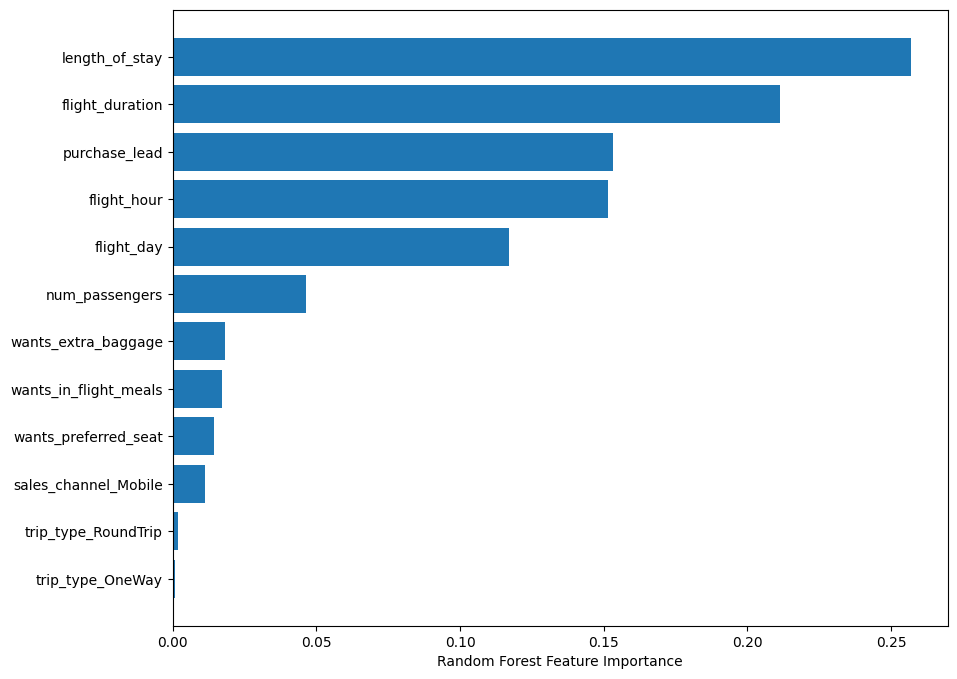

In [237]:
#Feature Importance
feature_importance= rf_classifier.feature_importances_
plt.figure(figsize=(10,8))
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Hence we can say that **length_of_stay**, **flight_duration**,**purchase_lead** , **flight_hour** and **flight_day** are the important features respectively affecting **booking_completion**.